In [1]:
# If you run this notebook on Google Colaboratory, uncomment the below to install automl_alex.
#!pip install -q -U automl_alex
#!pip install -q -U metricsreport

In [2]:
import automl_alex
import sklearn
import pandas as pd
import time
from automl_alex import DataPrepare
from automl_alex import AutoML, AutoMLClassifier, AutoMLRegressor
print('AutoML-Alex version:', automl_alex.__version__)

/root/anaconda3/envs/automl_py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AutoML-Alex version: 2023.3.9


In [3]:
RANDOM_SEED = 42

# Classifier

## Data

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
# https://www.openml.org/d/179
dataset = fetch_openml(data_id=179, as_frame=True)
dataset.target = dataset.target.astype('category').cat.codes
dataset.data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,2,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States
1,3,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States
2,2,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States
3,3,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States
4,1,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba


In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, 
                                                    dataset.target,
                                                    test_size=0.25, 
                                                    random_state=RANDOM_SEED,)
X_train.shape, X_test.shape

((36631, 14), (12211, 14))

## AutoML

In [6]:
model = AutoMLClassifier(random_state=RANDOM_SEED,)
model.fit(X_train, y_train, timeout=900)

16:02:32 | > Start Fit Base Model
16:02:47 | ##################################################
16:02:47 | > Start Fit Models 2
16:02:47 | ##################################################
16:02:47 | ##################################################
16:02:47 | > Step 1: calc parameters and pruned score: get test 10 trials
16:05:21 |  One iteration ~ 15.4 sec
16:05:21 |  Possible iters ~ 49.0
16:05:21 | ! Not enough time to find the optimal parameters. 
                     Possible iters < 100. 
                     Please, Increase the 'timeout' parameter for normal optimization and try again. 
 
16:05:21 | > Finish Opt!
16:05:21 | Best Score: 0.9054 roc_auc_score
16:05:21 | ##################################################
16:05:21 | > Fit Best Models
16:05:21 | ##################################################
16:06:15 | Save DataPrepare
16:06:22 | Save DataPrepare
16:06:27 | Save DataPrepare
16:06:36 | Save DataPrepare
16:06:49 | Save DataPrepare
16:06:49 | ####################

In [7]:
predicts = model.predict(X_test)

In [8]:
print('Test AUC: ', round(sklearn.metrics.roc_auc_score(y_test, predicts),4))

Test AUC:  0.9138


Detecting classification task type
threshold=0.5

                  |  Classification Report | 

              precision    recall  f1-score   support

     Class 0       0.88      0.94      0.91      9248
     Class 1       0.76      0.61      0.68      2963

    accuracy                           0.86     12211
   macro avg       0.82      0.77      0.79     12211
weighted avg       0.85      0.86      0.85     12211


                  |  Metrics Report: | 

                       score
AUC                   0.9138
Log Loss              0.3075
Average_Precision     0.7915
Accuracy              0.8582
Precision             0.8524
Recall                0.8582
F1 Score              0.8527
MCC                   0.5926
TN                 8672.0000
FP                  576.0000
FN                 1155.0000
TP                 1808.0000

                  |  Lift: | 

     target_cnt   cnt  target_cnt_cum  cnt_cum  target_share  \
top                                                          

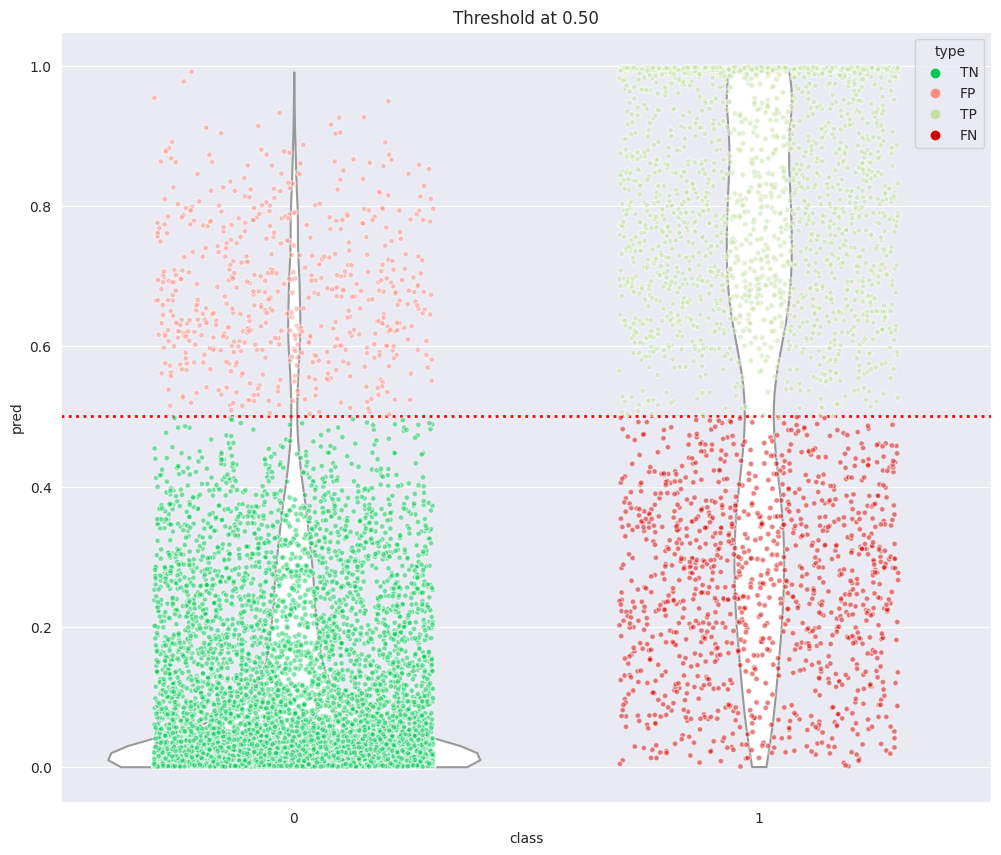

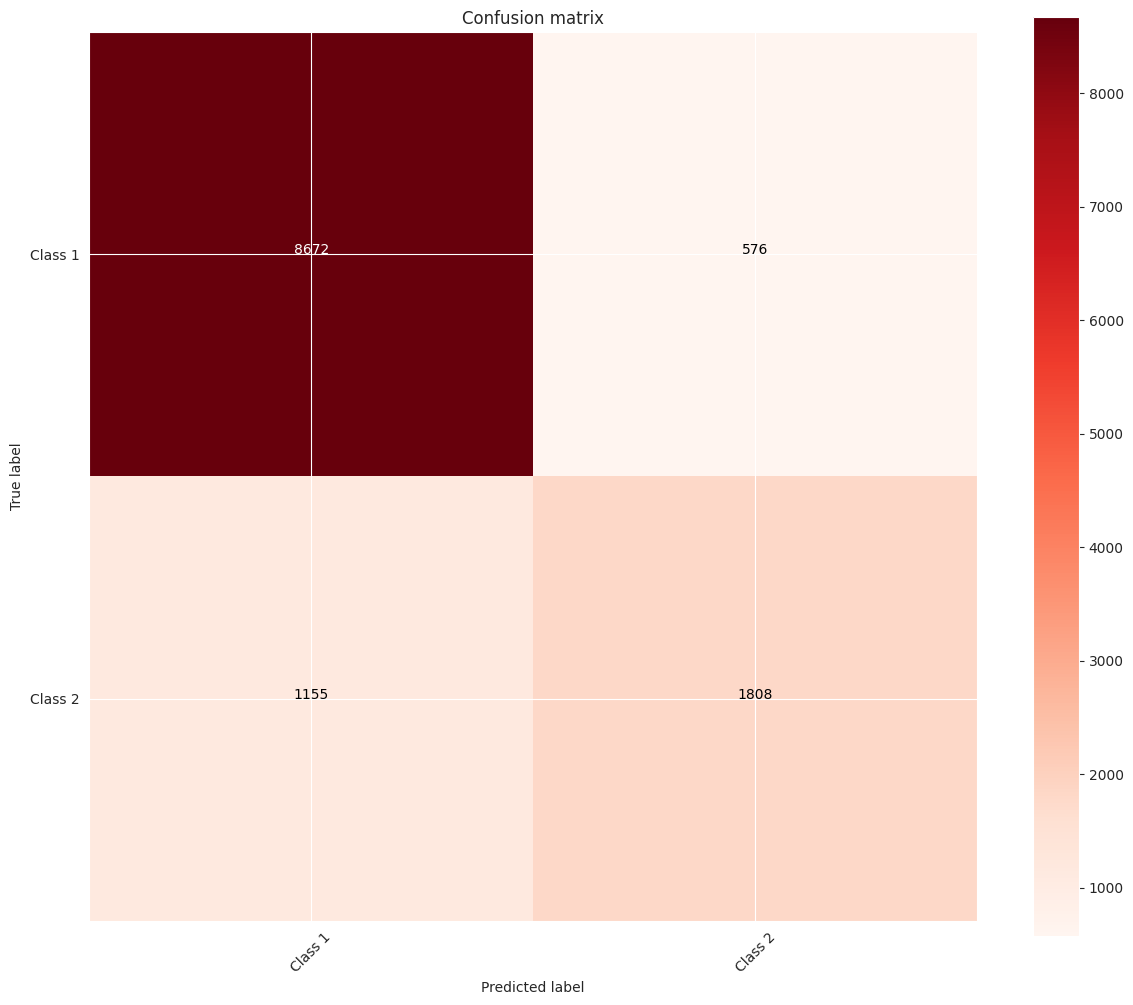

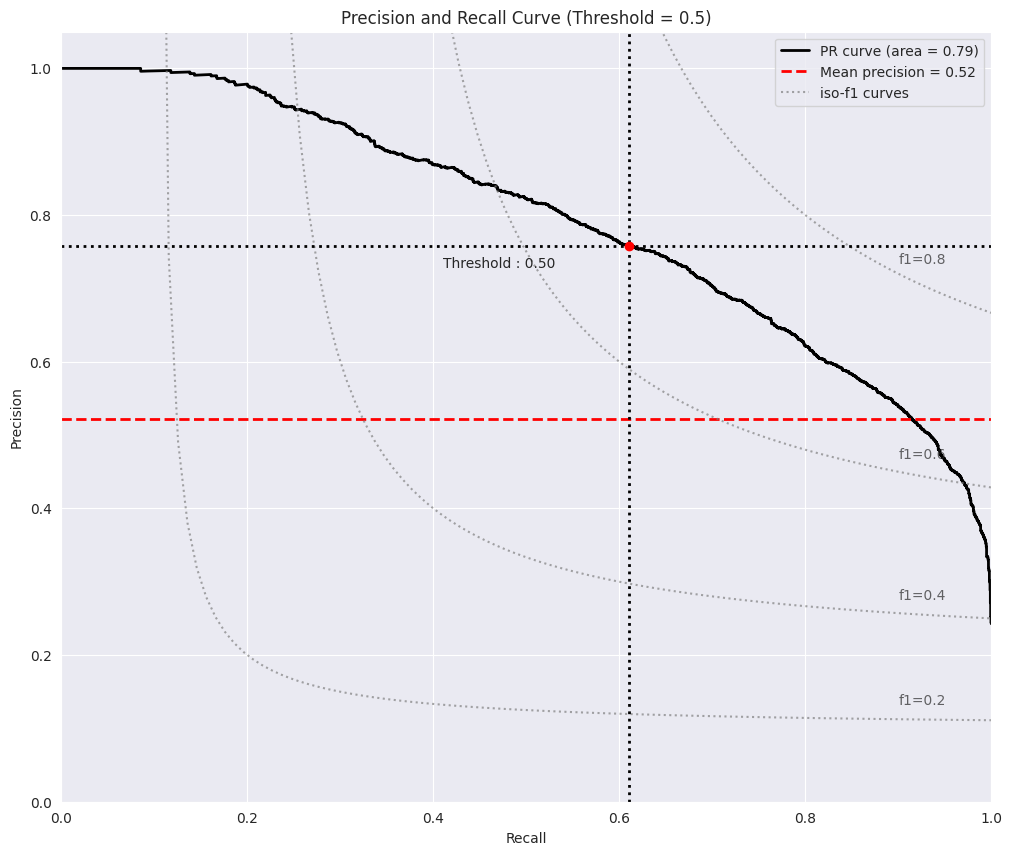

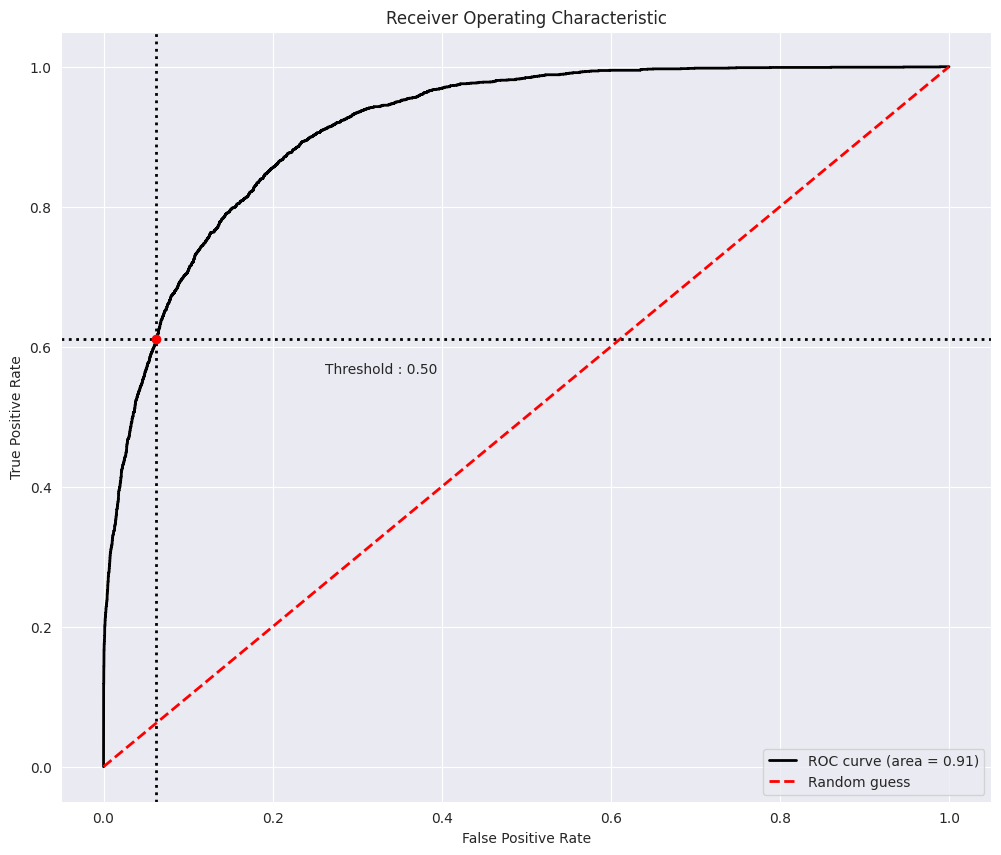

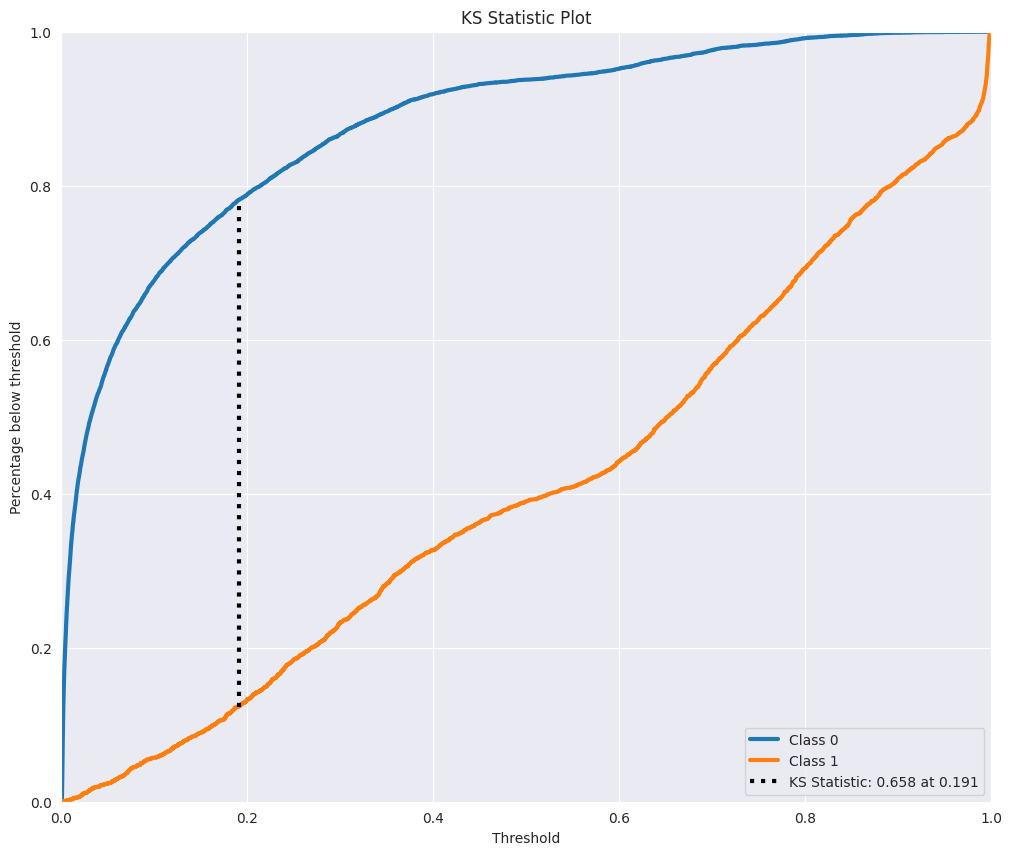

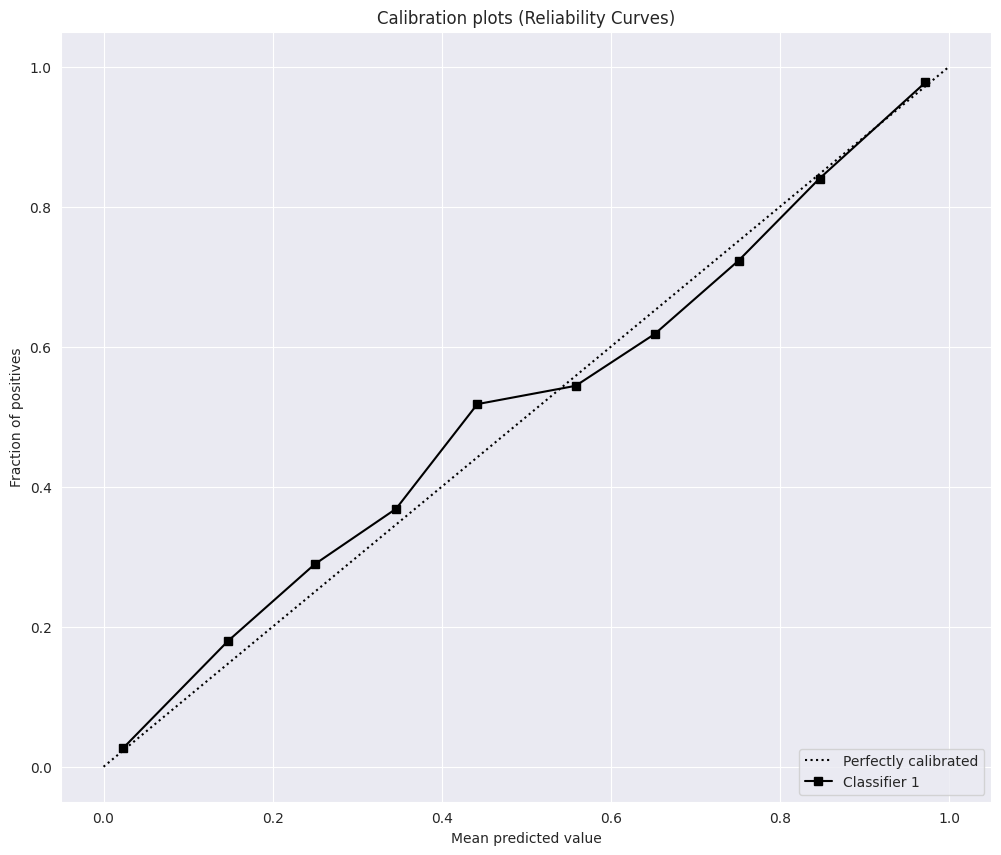

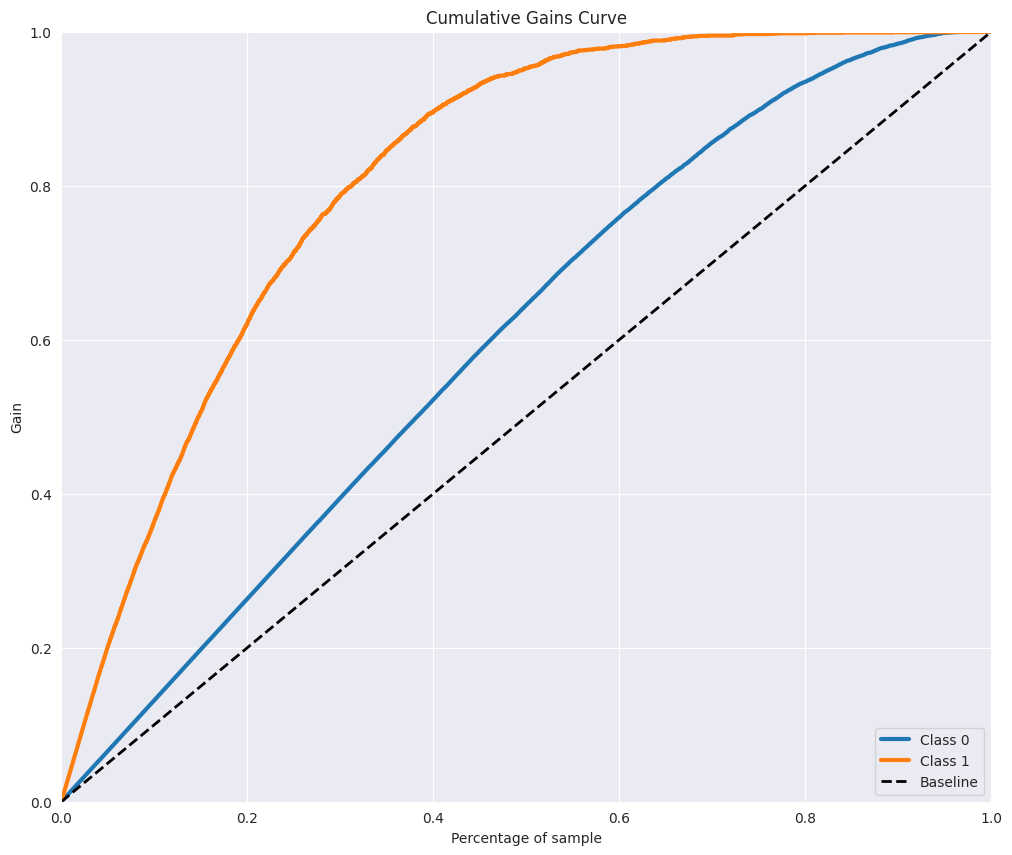

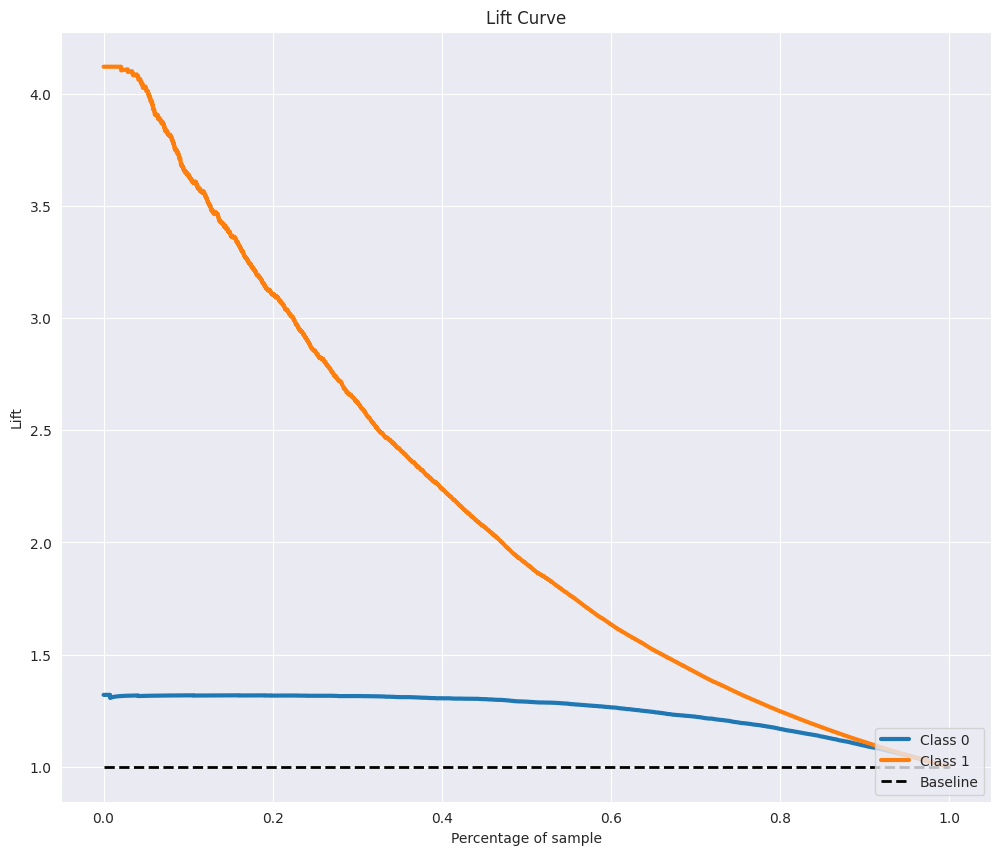

In [10]:
from metricsreport import MetricsReport  
# generate report 
report = MetricsReport(y_test, predicts, threshold=0.5)  
# print all metrics 
report.print_report()

## Save & Load

In [11]:
model.save('AutoML_model_1')

Save model


In [12]:
model_new = AutoMLClassifier(random_state=RANDOM_SEED,)
model_new = model_new.load('AutoML_model_1')

16:07:51 | Load AutoML


In [13]:
predicts = model_new.predict(X_test)
print('Test AUC: ', round(sklearn.metrics.roc_auc_score(y_test, predicts),4))

Test AUC:  0.9134


# Regression

## Data

In [14]:
# https://www.openml.org/d/543
dataset = fetch_openml(data_id=543, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(dataset.data), 
                                                    pd.DataFrame(dataset.target), 
                                                    test_size=0.15, 
                                                    random_state=RANDOM_SEED,)

X_train.shape, X_test.shape

((430, 19), (76, 19))

In [15]:
X_train.head(5)

,TOWN,TOWN_ID,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
104,Medford,24,3395,-71.0690,42.2480,20.1,20.1,0.13960,0.0,8.56,0,0.5200,6.167,90.0,2.4210,5,384,20.9,392.69
203,Weston,37,3671,-71.1990,42.2320,48.5,48.5,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78
381,Boston_East_Boston,79,407,-71.0410,42.2290,10.9,10.9,15.87440,0.0,18.10,0,0.6710,6.545,99.1,1.5192,24,666,20.2,396.90
489,Chelsea,89,1602,-71.0228,42.2335,7.0,7.0,0.18337,0.0,27.74,0,0.6090,5.414,98.3,1.7554,4,711,20.1,344.05
69,Wilmington,16,3313,-71.1110,42.3270,20.9,20.9,0.12816,12.5,6.07,0,0.4090,5.885,33.0,6.4980,4,345,18.9,396.90


In [16]:
y_train

,LSTAT
104,12.33
203,3.81
381,21.08
489,23.97
69,8.79
...,...
106,18.66
270,13.00
348,5.99
435,23.27


## AutoML

In [17]:
model = AutoMLRegressor(random_state=RANDOM_SEED,)
model.fit(X_train, y_train, timeout=300,)

16:08:17 | > Start Fit Base Model
16:08:17 | ! Not enough time to find the optimal parameters. 
                     Please, Increase the 'timeout' parameter for normal optimization. (min 600 sec)
16:08:18 | ##################################################
16:08:18 | > Start Fit Models 2
16:08:18 | ##################################################
16:08:18 | ##################################################
16:08:18 | > Step 1: calc parameters and pruned score: get test 10 trials
16:08:25 |  One iteration ~ 0.7 sec
16:08:25 |  Possible iters ~ 256.0
16:08:25 | --------------------------------------------------
16:08:25 |   Pruned Threshold Score: 30.8768
16:08:25 | ##################################################
16:08:25 | > Step 2: Full opt with Threshold Score Pruner
16:08:25 | ##################################################
16:08:25 | > Start optimization with the parameters:
16:08:25 | CV_Folds = 7
16:08:25 | Score_CV_Folds = 3
16:08:25 | Feature_Selection = True
16:08:25

In [18]:
predicts = model.predict(X_test)
print('Test MSE: ', round(sklearn.metrics.mean_squared_error(y_test, predicts),4))

Test MSE:  7.3504


Detecting regression task type

                  |  Metrics Report: | 

                                  score
Mean Squared Error               7.3504
Mean Squared Log Error           0.0434
Mean Absolute Error              2.0785
R^2                              0.8503
Explained Variance Score         0.8515
Max Error                        9.1127
Mean Absolute Percentage Error  19.4000

                  |  Plots: | 



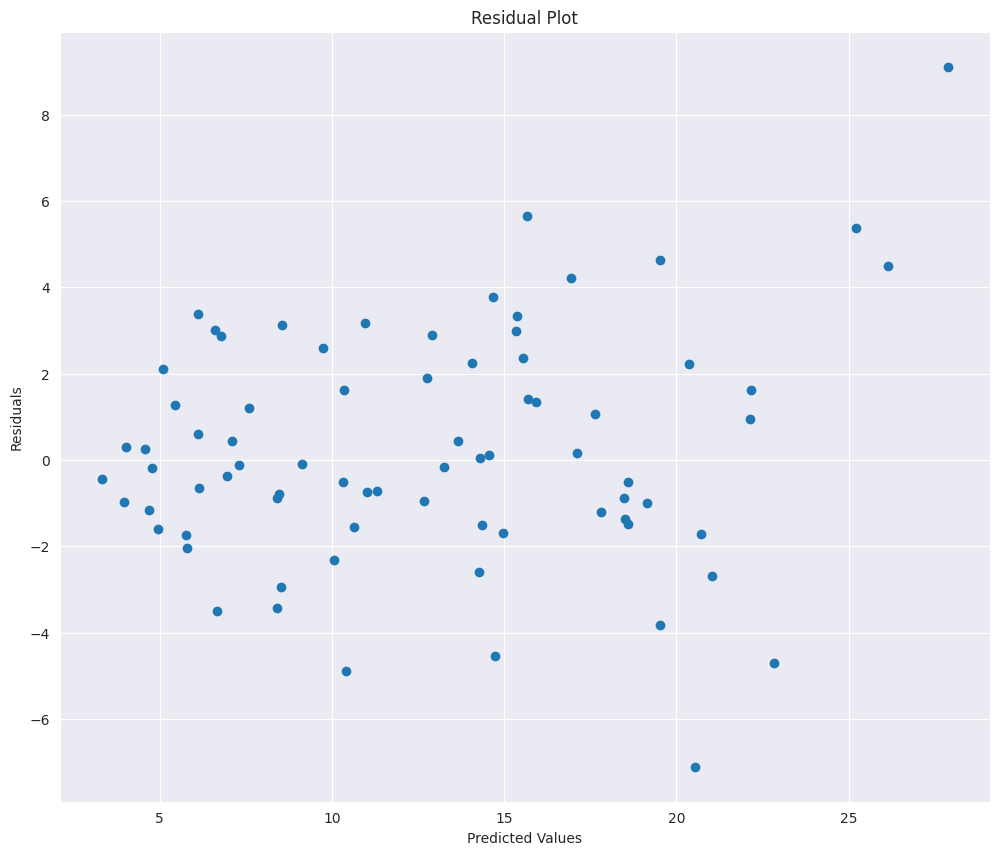

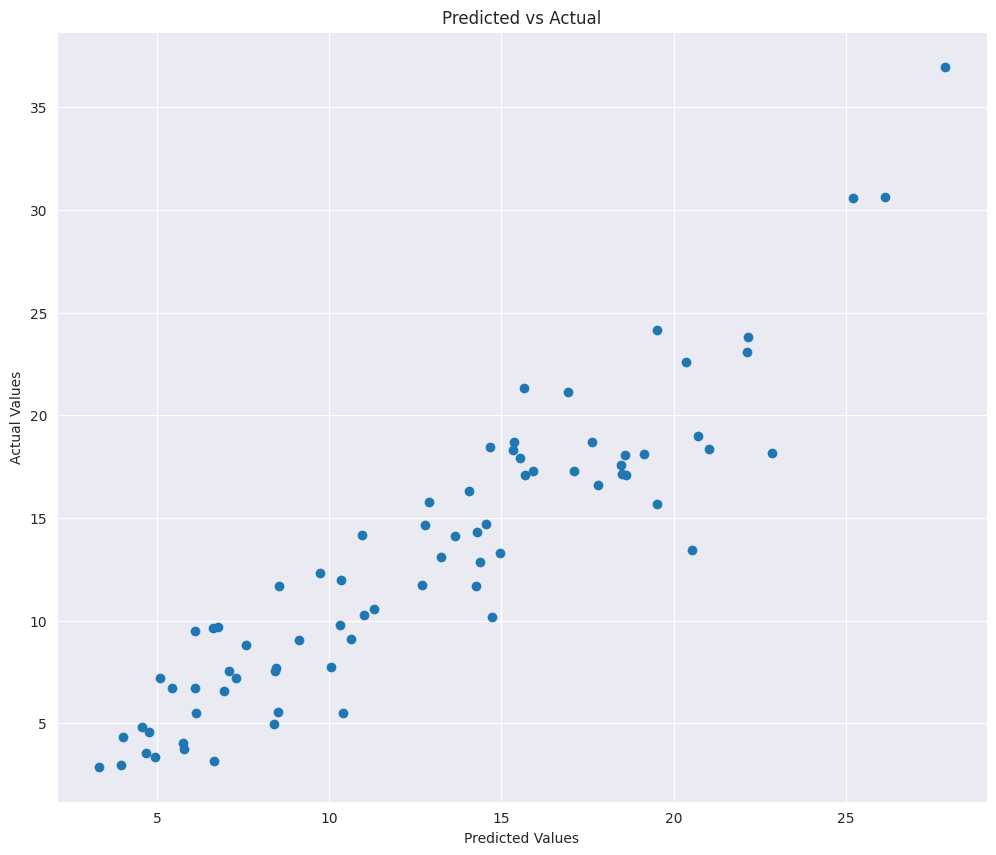

In [30]:
from metricsreport import MetricsReport  
# generate report 
report = MetricsReport(y_test['LSTAT'].values, predicts,)  
# print all metrics 
report.print_report()